<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance -q

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

**1. Chargement des données**

In [19]:
symbole = 'MSFT'

# Charge les données
data = yf.Ticker(symbole)

# Récupère l'historique
dataDf = data.history(interval='1d',start='2019-1-1', end='2021-1-1')
prix = dataDf.Open

# Génère automatique l'échelle des abcisses
# Ceci peut engendre des valeurs "NaN"
prix = prix.asfreq(pd.infer_freq(prix.index))
prix 

Date
2019-01-02     96.848093
2019-01-03     97.383170
2019-01-04     97.013496
2019-01-05           NaN
2019-01-06           NaN
                 ...    
2020-12-27           NaN
2020-12-28    223.934232
2020-12-29    225.789958
2020-12-30    224.712439
2020-12-31    221.190558
Freq: D, Name: Open, Length: 730, dtype: float64

Text(0.5, 1.0, 'Historique de MSFT')

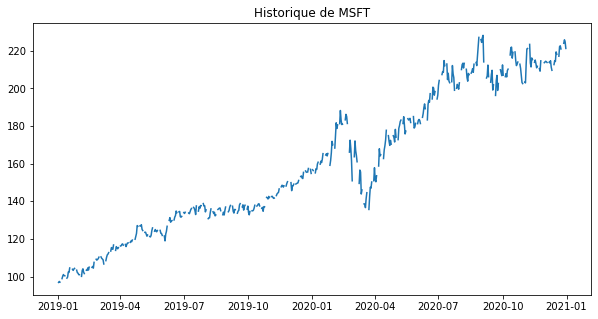

In [20]:
plt.figure(figsize=(10,5))
plt.plot(prix)
plt.title("Historique de %s" %symbole)

**2. Algorithme de trading**

On applique l'algorithme suivant :
  - **Achat** : Si l'action croit sur un nombre de jour spécifique "a"
  - **Vente** : Si l'action décroit sur un nombre de jour spécifique "v" et que nous avons fait un profit

In [ ]:
# Définition de l'algorithme de trading

def AlgorithmeTrading(prix,a,v):
  